# Introduction to Data Science – Lecture 14 – APIs
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture we will explore Twitter API. 
  
 * [Twitter](https://dev.twitter.com/rest/public)
 

## Libraries and Authentication

While we now have the skills to directly talk to an API, it's sometimes a little tedious. Popular APIs often have existing Python libraries that wrap around them. [Here](https://github.com/realpython/list-of-python-api-wrappers) is a long list of wrappers! 

Now we'll explore the Twitter API using the [twython library](https://github.com/ryanmcgrath/twython). Check out the [documentation](https://twython.readthedocs.io/en/latest/).

Unfortunately, most professional APIs will require you to authenticate and will limit you in what you can do – mostly they limit how much data you can retreive at a certain time. To run the following code, you'll have to put in your own credentials (sorry – I can't share mine). 

Install twython:
`pip install twython`

* First, you need to have a developer account https://developer.twitter.com/en
* Second, create an app 
* Third, save your api key and api key secret in a file `credentials.py` in the format:
```python
API_KEY = "KEY"
API_KEY_SECRET = "KEY"
```
* You will need at least an Elevated access level (free) for the following code to work

But before we get started, let's check out what [a tweet looks like](https://dev.twitter.com/overview/api/tweets):

```JSON
{'created_at': 'Mon Mar 01 19:58:00 +0000 2021',
  'id': 1366477842213707784,
  'id_str': '1366477842213707784',
  'text': 'This afternoon, I’ll be meeting virtually with Mexican President Andrés Manuel López Obrador. The U.S.-Mexico relat… https://t.co/4M2OgsL7uX',
  'truncated': True,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/4M2OgsL7uX',
     'expanded_url': 'https://twitter.com/i/web/status/1366477842213707784',
     'display_url': 'twitter.com/i/web/status/1…',
     'indices': [117, 140]}]},
  'source': '<a href="https://www.sprinklr.com" rel="nofollow">The White House</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 1349149096909668363,
   'id_str': '1349149096909668363',
   'name': 'President Biden',
   'screen_name': 'POTUS',
   'location': '',
   'description': '46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: https://t.co/IURuMIrzxb',
   'url': 'https://t.co/IxLjEB2zlE',
   'entities': {'url': {'urls': [{'url': 'https://t.co/IxLjEB2zlE',
       'expanded_url': 'http://WhiteHouse.gov',
       'display_url': 'WhiteHouse.gov',
       'indices': [0, 23]}]},
    'description': {'urls': [{'url': 'https://t.co/IURuMIrzxb',
       'expanded_url': 'http://whitehouse.gov/privacy',
       'display_url': 'whitehouse.gov/privacy',
       'indices': [98, 121]}]}},
   'protected': False,
   'followers_count': 8329657,
   'friends_count': 12,
   'listed_count': 9248,
   'created_at': 'Wed Jan 13 00:37:08 +0000 2021',
   'favourites_count': 0,
   'utc_offset': None,
   'time_zone': None,
   'geo_enabled': False,
   'verified': True,
   'statuses_count': 238,
   'lang': None,
   'contributors_enabled': False,
   'is_translator': False,
   'is_translation_enabled': False,
   'profile_background_color': 'F5F8FA',
   'profile_background_image_url': None,
   'profile_background_image_url_https': None,
   'profile_background_tile': False,
   'profile_image_url': 'http://pbs.twimg.com/profile_images/1349837426626330628/CRMNXzQJ_normal.jpg',
   'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1349837426626330628/CRMNXzQJ_normal.jpg',
   'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1349149096909668363/1614313035',
   'profile_link_color': '1DA1F2',
   'profile_sidebar_border_color': 'C0DEED',
   'profile_sidebar_fill_color': 'DDEEF6',
   'profile_text_color': '333333',
   'profile_use_background_image': True,
   'has_extended_profile': True,
   'default_profile': True,
   'default_profile_image': False,
   'following': None,
   'follow_request_sent': None,
   'notifications': None,
   'translator_type': 'none'},
  'geo': None,
  'coordinates': None,
  'place': None,
  'contributors': None,
  'is_quote_status': False,
  'retweet_count': 2155,
  'favorite_count': 19136,
  'favorited': False,
  'retweeted': False,
  'lang': 'en'}
```


In [25]:
from twython import Twython
# credentials is a local file with your own credentials.
# you will have to load your own credentials here.
from credentials_bei import * 
twitter = Twython(API_KEY, API_KEY_SECRET)

Here, we have created the Twython library object and authenticated against our user.

Now let's search for a hashtag:

In [26]:
tag = "#covid19"
result = twitter.search(q=tag, tweet_mode="extended")
result

{'statuses': [{'created_at': 'Thu Feb 24 17:26:43 +0000 2022',
   'id': 1496899403012923397,
   'id_str': '1496899403012923397',
   'full_text': 'RT @Mippcivzla: #EnFotos 📸 |  Pdte @NicolasMaduro anunció que Venezuela alcanzó el 102% de la meta de vacunación contra la #COVID19 de las…',
   'truncated': False,
   'display_text_range': [0, 139],
   'entities': {'hashtags': [{'text': 'EnFotos', 'indices': [16, 24]},
     {'text': 'COVID19', 'indices': [123, 131]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'Mippcivzla',
      'name': 'MIPPCI',
      'id': 839299289792774144,
      'id_str': '839299289792774144',
      'indices': [3, 14]},
     {'screen_name': 'NicolasMaduro',
      'name': 'Nicolás Maduro',
      'id': 1252764865,
      'id_str': '1252764865',
      'indices': [35, 49]}],
    'urls': []},
   'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
   'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 

In [27]:
tag = "#war"
result = twitter.search(q=tag, tweet_mode="extended")
result

{'statuses': [{'created_at': 'Thu Feb 24 17:26:58 +0000 2022',
   'id': 1496899467483791362,
   'id_str': '1496899467483791362',
   'full_text': 'RT @Ted_Kac: Russian soldiers near Chernobyl nuclear power facility \n\n#ukraine #war https://t.co/tJYbqHkNQK',
   'truncated': False,
   'display_text_range': [0, 107],
   'entities': {'hashtags': [{'text': 'ukraine', 'indices': [70, 78]},
     {'text': 'war', 'indices': [79, 83]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'Ted_Kac',
      'name': 'Ted K',
      'id': 4865175485,
      'id_str': '4865175485',
      'indices': [3, 11]}],
    'urls': [],
    'media': [{'id': 1496892771336167434,
      'id_str': '1496892771336167434',
      'indices': [84, 107],
      'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1496892771336167434/pu/img/Duf-BgWYiSlTurmx.jpg',
      'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1496892771336167434/pu/img/Duf-BgWYiSlTurmx.jpg',
      'url': 'https://t.co/tJYbqHkNQK',
    

The result is an array of tweets, we can look at specific text:

In [28]:
result["statuses"][0]["full_text"]

'RT @Ted_Kac: Russian soldiers near Chernobyl nuclear power facility \n\n#ukraine #war https://t.co/tJYbqHkNQK'

Or print all the tweets:

In [29]:
for status in result["statuses"]:
    print(status["full_text"])
    print("----")

RT @Ted_Kac: Russian soldiers near Chernobyl nuclear power facility 

#ukraine #war https://t.co/tJYbqHkNQK
----
The images coming out of #Ukraine are horrifying.

#UkraineRussiaConflict #RussiaUkraine #war #NATO #UkraineisGeorgeFloyd https://t.co/DGE7axgdtg
----
To everyone affected by the #war in #Ukraine, I wish for you and your close ones to be safe.

I have friends and family members there, thankfully they all safe and well, though, understandably, emotionally distressed.
----
RT @Outlookindia: Markets are nervous as global #money flies out in search of safe havens amid uncertainty. When markets take a hit, retail…
----
RT @JackOttOMeta: I’m going to give $10,000 to someone who retweets this tweet because i want to spread message of #STOPWAR (must be follow…
----
RT @ozyurt_oguzhan: Çocukların memleketi, dini, ırkı, çıkarı yoktur. Çocuk yalnızca çocuktur... #Putin #Belarus #Ukraine #Ukrayna #war http…
----
Ukraine Seeks PM Modi’s Help In War With Russia, Cites ‘Mahabharata’
Read M

## Analysis of Twitter Popularity

Let's do a brief analysis of twitter popularity of two political figures: Joe Biden's official POTUS account and Alexandria Ocasio-Cortez. As you would expect, Biden's personal account has more twitter followers (29 million) than AOC (12.6 million), though the POTUS account has only 8 million followers. We're using the POTUS account, because Biden's account has mostly been used for retweeting POTUS ever since he took office. As an aside, Barack Obama has 130 million followers, and Justin Bieber has 114 million. 

We can search for tweets based on usernames:

In [30]:
result = twitter.search(q="@joebiden",  tweet_mode="extended")
for status in result["statuses"]:
    print(status["full_text"])
    print("----")

@DavidAcquaviva @JoeBiden Eh more like blackmailed and paid off
----
@LucianoHuck @pauloap @JoeBiden não é a toa que a mulher precisa de vibrador
----
@JakeMachen @JoeBiden I spit my coffee out while reading this 😂 thank you for that
----
RT @JoeSilverman7: This is the worst I’ve ever seen things for this country. @JoeBiden has done more damage in a year than any other presid…
----
@LucianoHuck @JoeBiden Que feio....
----
@stevepaul59 @BestComment4 @govkristinoem @JoeBiden Putin is scared also. Dementia is tuff
----
@RitaJ2011 @POTUS @write2bheard1 @JoeBiden NO ONE HAD A JOB,
----
@lanuevance9 @JoeBiden @macron Mais l'Algérie est pro Russie ....
----
#PUTIN IS NOT “#CHRISTIAN! #Canada: This #UKRAINE #INVASION is what #TRUMP the #BEAST will do to YOU! #PATRIOTS: we must arm Canada!! @JustinTrudeau @UN: EXPELL #Russia! @CandiceBergenMP #Orthodox EXCOMMUNICATE #PUTIN! @CTVNews @CBCNews @JoeBiden @EcuPatriarch @EWTN @EWTNVatican
----
@ScottWalker @JoeBiden You follow Putin you hypocrite.
-

This returns all tweets that are mentioning a username. 

We can also explicitly get the tweets of a person. Let's download Biden's last 50 tweets. [Here](https://dev.twitter.com/rest/reference/get/statuses/user_timeline) is the relevant API documentation, [here](https://github.com/ryanmcgrath/twython/blob/master/twython/endpoints.py) are the definitions for twython. 

Note that you get an error message if you try this with an account that is locked (like Trump's) or that doesn't exist.

In [31]:
#twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# count is limited to the last 3200 tweets of a user, a max of 200 per request
biden_result = twitter.get_user_timeline(screen_name="potus", count=50)
biden_result

[{'created_at': 'Thu Feb 24 05:19:52 +0000 2022',
  'id': 1496716484906819589,
  'id_str': '1496716484906819589',
  'text': 'Tomorrow, I will be meeting with the Leaders of the G7, and the United States and our Allies and partners will be i… https://t.co/Yr6PGrqNBu',
  'truncated': True,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/Yr6PGrqNBu',
     'expanded_url': 'https://twitter.com/i/web/status/1496716484906819589',
     'display_url': 'twitter.com/i/web/status/1…',
     'indices': [117, 140]}]},
  'source': '<a href="https://www.sprinklr.com" rel="nofollow">The White House</a>',
  'in_reply_to_status_id': 1496716483439001601,
  'in_reply_to_status_id_str': '1496716483439001601',
  'in_reply_to_user_id': 1349149096909668363,
  'in_reply_to_user_id_str': '1349149096909668363',
  'in_reply_to_screen_name': 'POTUS',
  'user': {'id': 1349149096909668363,
   'id_str': '1349149096909668363',
   'name': 'President Biden',
   's

Let's count the numbers for Biden's favorites and retweets.

In [32]:
biden_favorites = []
biden_retweets = []
biden_texts = []
for status in biden_result:
    print(status["text"])
    print(status["favorite_count"])
    print("----")
    biden_favorites.append(status["favorite_count"])
    biden_retweets.append(status["retweet_count"])
    biden_texts.append(status["text"])

Tomorrow, I will be meeting with the Leaders of the G7, and the United States and our Allies and partners will be i… https://t.co/Yr6PGrqNBu
66668
----
He asked me to call on the leaders of the world to speak out clearly against President Putin’s flagrant aggression,… https://t.co/1yfnDKOOZ6
56029
----
President Zelenskyy reached out to me tonight and we just finished speaking. I condemned this unprovoked and unjust… https://t.co/0Rp4d7dZy4
111272
----
Russia alone is responsible for the death and destruction this attack will bring, and the United States and its All… https://t.co/L7OQoekJk5
268659
----
The prayers of the world are with the people of Ukraine tonight as they suffer an unprovoked and unjustified attack… https://t.co/ohMFnNDJSY
117284
----
President Putin’s actions demand a firm response. That’s why we’re imposing full blocking sanctions on VEB and Russ… https://t.co/AZECe1QD4L
65095
----
The Bipartisan Infrastructure Law is a once-in-a-generation investment — and these ac

Now let's do the same for Alexandria Ocasio-Cortez.

In [33]:
aoc_results = twitter.get_user_timeline(screen_name="aoc", count=50)
aoc_results

[{'created_at': 'Mon Feb 21 17:43:56 +0000 2022',
  'id': 1495816574514700292,
  'id_str': '1495816574514700292',
  'text': 'RT @JaxAlemany: “I can’t underscore how much the hesitancy of the Biden admin to pursue student loan cancelation has demoralized a very cri…',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'JaxAlemany',
     'name': 'Jacqueline Alemany',
     'id': 307982591,
     'id_str': '307982591',
     'indices': [3, 14]}],
   'urls': []},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 138203134,
   'id_str': '138203134',
   'name': 'Alexandria Ocasio-Cortez',
   'screen_name': 'AOC',
   'location': 'Bronx + Queens, NYC',
   'description': 'US Representative,NY-14 (BX & Queens).

In [34]:
aoc_favorites = []
aoc_retweets = []
aoc_texts = []
for status in aoc_results:
    print(status["text"])
    print(status["favorite_count"])
    print("----")
    aoc_favorites.append(status["favorite_count"])
    aoc_retweets.append(status["retweet_count"])
    aoc_texts.append(status["text"])

RT @JaxAlemany: “I can’t underscore how much the hesitancy of the Biden admin to pursue student loan cancelation has demoralized a very cri…
0
----
Imagine if defunding schools was as politically controversial as not wanting to fund robodogs and mass surveillance… https://t.co/OrJLeasDOq
34501
----
RT @GeorgeTakei: For the Japanese American community, today is a solemn day. It's the Day of Remembrance, the anniversary of FDR's Executiv…
0
----
It’s not within the realm of political commentary, &amp; it’s not just me. He regularly targets people that do not have… https://t.co/ozw1c5FXWP
53828
----
I genuinely want to know why Tucker Carlson is allowed/paid to engage in clear, targeted, libelous harassment that… https://t.co/kqDUr8ZdFf
120585
----
Because:
a) they prev. wouldn’t vote to limit their own enrichment &amp;

b) they score political points by voting down… https://t.co/7ZgcgIVTSR
7921
----
Any man that talks like this will treat any woman like this.

Doesn’t matter if you’re Re

And let's create DataFrames for both of them and explore their stats:

In [35]:
import pandas as pd 

biden_stats = pd.DataFrame({
        "Biden Fav":biden_favorites,
        "Biden RT":biden_retweets,
        "Biden Text":biden_texts
    })

aoc_stats = pd.DataFrame({
      "AOC Fav":aoc_favorites,
      "AOC RT":aoc_retweets, 
      "AOC Text":aoc_texts
        })

In [36]:
biden_stats.head()

,Biden Fav,Biden RT,Biden Text
0,66668,9818,"Tomorrow, I will be meeting with the Leaders o..."
1,56029,6605,He asked me to call on the leaders of the worl...
2,111272,18544,President Zelenskyy reached out to me tonight ...
3,268659,52150,Russia alone is responsible for the death and ...
4,117284,30706,The prayers of the world are with the people o...


In [37]:
biden_stats.describe()

,Biden Fav,Biden RT
count,50.000000,50.000000
mean,34659.780000,5906.700000
std,45703.133603,8734.059818
min,2165.000000,375.000000
25%,9622.750000,1886.250000
50%,18259.500000,3601.000000
75%,43743.250000,5403.000000
max,268659.000000,52150.000000


We will plot the tweet data; but we have to sort them first so that they make sense. 

In [38]:
biden_stats = biden_stats.sort_values("Biden Fav", ascending=False)
biden_stats = biden_stats.reset_index(drop=True)
biden_stats.head(30)

,Biden Fav,Biden RT,Biden Text
0,268659,52150,Russia alone is responsible for the death and ...
1,130059,18794,I have signed an Executive Order to deny Russi...
2,117284,30706,The prayers of the world are with the people o...
3,111272,18544,President Zelenskyy reached out to me tonight ...
4,79974,14360,We're calling out Russia’s plans. Not because ...
5,70471,10291,"Today, in close coordination with our Allies a..."
6,68265,9126,I say again: Russia can still choose diplomacy...
7,66668,9818,"Tomorrow, I will be meeting with the Leaders o..."
8,65095,9496,President Putin’s actions demand a firm respon...
9,63475,11446,The American people are united. Europe is unit...


In [39]:
biden_stats.tail(10)

,Biden Fav,Biden RT,Biden Text
40,6494,1318,With our $1 billion investment in the Great La...
41,4824,1198,Watch live as I give an update on our continue...
42,4694,907,Tune in as I host an event on securing critica...
43,4435,911,"With the Bipartisan Infrastructure Law, we’re ..."
44,4336,649,The FCC’s Affordable Connectivity Program has ...
45,4049,856,Tune in as I deliver remarks on how the Bipart...
46,4044,611,The Vice President announced the Lead Pipe and...
47,2847,584,The Bipartisan Infrastructure Law is a once-in...
48,2716,443,The U.S. Army Corps of Engineers announced fun...
49,2165,375,The Department of Transportation announced the...


In [40]:
aoc_stats = aoc_stats.sort_values("AOC Fav", ascending=False)
aoc_stats = aoc_stats.reset_index(drop=True)
aoc_stats.head(30)

,AOC Fav,AOC RT,AOC Text
0,167253,16230,This is the type of stuff you say when your na...
1,120585,16026,I genuinely want to know why Tucker Carlson is...
2,94183,5533,"Like I said, weirdos https://t.co/jTORwHc4JA"
3,80558,9844,Remember when the right wing had a meltdown wh...
4,71921,4266,Ted Cruz could never https://t.co/lGAO45uuy2
5,66877,5152,Any man that talks like this will treat any wo...
6,53828,4499,It’s not within the realm of political comment...
7,51603,10426,One US Senator “heard stories” about people al...
8,40729,6462,"When I talk about violent conditions, this is ..."
9,34501,6311,Imagine if defunding schools was as politicall...


In [41]:
combined = aoc_stats.copy()
combined["Biden Fav"] = biden_stats["Biden Fav"]
combined["Biden RT"] = biden_stats["Biden RT"]

<AxesSubplot:>

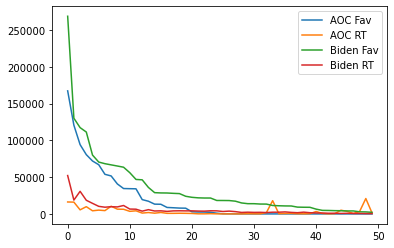

In [42]:
combined.plot()

In [43]:
russia_results = twitter.get_user_timeline(screen_name="KremlinRussia_E", count=50)
russia_results

[{'created_at': 'Thu Feb 24 13:33:17 +0000 2022',
  'id': 1496840656357974016,
  'id_str': '1496840656357974016',
  'text': '#Kremlin: Vladimir Putin met with Prime Minister of Pakistan Imran Khan, who is in Russia on a working visit… https://t.co/BseU5trwdg',
  'truncated': True,
  'entities': {'hashtags': [{'text': 'Kremlin', 'indices': [0, 8]}],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/BseU5trwdg',
     'expanded_url': 'https://twitter.com/i/web/status/1496840656357974016',
     'display_url': 'twitter.com/i/web/status/1…',
     'indices': [110, 133]}]},
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 205622130,
   'id_str': '205622130',
   'name': 'President of Russia',
   'screen_name': 'KremlinRussia_E',
   'location': 'Mo